In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip data in Google Drive
#!unzip '/content/drive/My Drive/INZYNIERKA/Dane_1/HAM10000_mel/archive.zip' -d '/content/drive/My Drive/INZYNIERKA/Dane_1/HAM10000_mel/'

## LIBRARIES

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from glob import glob
import sklearn.utils
from tensorflow import keras

from keras import regularizers

from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import adam_v2, Adam

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import plot_model

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization, GlobalAveragePooling2D, AveragePooling2D, Activation

from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.efficientnet import EfficientNetB7

ImportError: ignored

## PATH TO IMAGES

In [ ]:
train_path = '/content/drive/My Drive/INZYNIERKA/Dane_1/HAM10000_mel/DermMel/train_sep/'
test_path = '/content/drive/My Drive/INZYNIERKA/Dane_1/HAM10000_mel/DermMel/test/'
val_path = '/content/drive/My Drive/INZYNIERKA/Dane_1/HAM10000_mel/DermMel/valid/'

#Liczba zdjęć w folderze train
print(f"Train set: {len(glob(os.path.join(train_path, '*', '*.jpg'))) + len(glob(os.path.join(train_path, '*', '*.jpeg')))} = 60%")

#Liczba zdjęć w folderze test
print(f"Test set: {len(glob(os.path.join(test_path, '*', '*.jpg'))) + len(glob(os.path.join(test_path, '*', '*.jpeg')))} = 20%")

#Liczba zdjęć w folderze val
print(f"Val set: {len(glob(os.path.join(val_path, '*', '*.jpg'))) + len(glob(os.path.join(val_path, '*', '*.jpeg')))} = 20%")

Train set: 10682 = 60%
Test set: 3561 = 20%
Val set: 3562 = 20%


## IMAGE DATA GENERATOR

In [2]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
    shear_range=0.1,
    zoom_range=0.1, # Randomly zoom image
    horizontal_flip=True, # randomly flip images
    vertical_flip=True,  # randomly flip images
    fill_mode='nearest')

test_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255, # zmiana wartości pikseli do zakresu 0-1
    rotation_range=20, # przypadkowy obrót w zakresie 0-20 stopni
    width_shift_range=0.1, # przypadkowe przesuniecie w poziomie o 10% całej szerokości
    height_shift_range=0.1, # przypadkowe przesuniecie w pionie o 10% całej wysokości
    shear_range=0.1, #przypadkowe ścinanie obrazu o 10%
    zoom_range=0.1, # przypadkowe przybliżenie o 10%
    horizontal_flip=True, # przypadkowe przerzucenie w poziomie
    vertical_flip=True,  # przypadkowe przerzucenie w pionie
    fill_mode='nearest') # sposób wypleninia brakujących pikseli

test_val_gen = ImageDataGenerator(rescale=1./255)

train = train_gen.flow_from_directory(
    train_path,
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224))

val = test_val_gen.flow_from_directory(
    val_path,
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224))

test = test_val_gen.flow_from_directory(
    test_path,
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224))

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


## LOADING DATASETS

In [ ]:
train = data_gen.flow_from_directory(
    train_path,
    batch_size=20,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224))

val = test_gen.flow_from_directory(
    val_path,
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224))

test = test_gen.flow_from_directory(
    test_path,
    batch_size=20,
    shuffle=False,
    class_mode='binary',
    target_size=(224, 224))

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
print(train.class_indices)
print(val.class_indices)
print(test.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}
{'Melanoma': 0, 'NotMelanoma': 1}


In [ ]:
values, counts = np.unique(val.classes, return_counts=True)
print(counts)

[1781 1781]


## IMAGE DISPLAY

In [4]:
example_path = '/content/drive/My Drive/INZYNIERKA/Dane_1/IDG/tuk'
example_img = os.listdir(example_path)

sample_img = plt.imread(os.path.join(example_path, example_img[0]))

plt.figure(dpi=100)
plt.imshow(sample_img)
plt.colorbar()
plt.title('Obraz orginalny')
plt.axis("off")
plt.show()

print(f"Rozmiar zdjęcia: {sample_img.shape}")
print(f"Max pixel: {sample_img.max():.2f}")
print(f"Min pixel {sample_img.min():.2f}")
print(f"Średnia: {sample_img.mean():.2f} ")
print(f"Odchylenie standardowe: {sample_img.std():.2f}")

FileNotFoundError: ignored

In [ ]:
example_path = '/content/drive/My Drive/INZYNIERKA/Dane_1/IDG'

t = data_gen.flow_from_directory(
    example_path,
    batch_size=1,
    shuffle=True,
    class_mode='binary',
    target_size=(224, 224))

Found 2 images belonging to 2 classes.


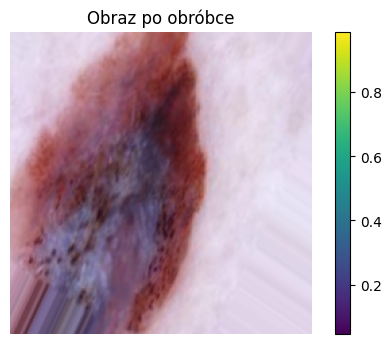

Rozmiar zdjęcia: (20, 224, 224, 3)
Max pixel: 1.00
Min pixel 0.00
Średnia: 0.68 
Odchylenie standardowe: 0.19


In [ ]:
trans_img, label = t.__getitem__(1)

plt.figure(dpi=100)
plt.imshow(trans_img[0])
plt.colorbar()
plt.axis("off")
plt.title('Obraz po obróbce')
plt.show()

print(f"Rozmiar zdjęcia: {trans_img.shape}")
print(f"Max pixel: {trans_img.max():.2f}")
print(f"Min pixel {trans_img.min():.2f}")
print(f"Średnia: {trans_img.mean():.2f} ")
print(f"Odchylenie standardowe: {trans_img.std():.2f}")

## METRICS and OPTIMIZERS

In [ ]:
METRICS = ['accuracy',
           tf.keras.metrics.Precision(name='precision'),
           tf.keras.metrics.Recall(name='recall'),
           tf.keras.metrics.AUC(name='AUC')]


#optimizer = adam_v2.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

adam_001 = tf.keras.optimizers.Adam(learning_rate=0.001)
adam_0001 = tf.keras.optimizers.Adam(learning_rate=0.0001)
adam_00001 = tf.keras.optimizers.Adam(learning_rate=0.00001)

#################################################

#Callbacks
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=5, verbose=0, factor=0.5, min_lr=0.00001)
early_stopping_monitor = EarlyStopping(patience=20 ,monitor='val_accuracy')

earlyStopping = EarlyStopping(monitor='loss', patience=10, verbose=1, mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='loss', factor=0.5, patience=3, verbose=1, min_lr=0.00005, min_delta=1e-4, mode='min')

## SIZE OF MODELS

In [ ]:
dense_base_model = DenseNet121(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')
resnet50_base_model = ResNet50(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')
efficient_base_model = EfficientNetB7(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')
inception_base_model = InceptionV3(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')
vgg_base_model = VGG16(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')


In [ ]:
for layer in inception_base_model.layers[:-10]:
  layer.trainable = False
for layer in inception_base_model.layers[-10:]:
  layer.trainable = True

In [ ]:
for i, layer in enumerate(inception_base_model.layers):
   print(i, layer.name, layer.trainable)

0 input_9 False
1 conv2d_94 False
2 batch_normalization_94 False
3 activation_94 False
4 conv2d_95 False
5 batch_normalization_95 False
6 activation_95 False
7 conv2d_96 False
8 batch_normalization_96 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_97 False
12 batch_normalization_97 False
13 activation_97 False
14 conv2d_98 False
15 batch_normalization_98 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_102 False
19 batch_normalization_102 False
20 activation_102 False
21 conv2d_100 False
22 conv2d_103 False
23 batch_normalization_100 False
24 batch_normalization_103 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_99 False
29 conv2d_101 False
30 conv2d_104 False
31 conv2d_105 False
32 batch_normalization_99 False
33 batch_normalization_101 False
34 batch_normalization_104 False
35 batch_normalization_105 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False
40 mixed

## MODEL 1 (densenet121)

In [ ]:
dense_base_model = DenseNet121(input_shape=(244, 244, 3),
                               pooling = 'avg',
                               include_top=False,
                               weights='imagenet')

dense_model = tf.keras.Sequential([
        dense_base_model,
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation="sigmoid")])

dense_model.compile(loss='binary_crossentropy',
                  optimizer = adam_0001,
                  metrics = METRICS)


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
for i, layer in enumerate(dense_base_model.layers):
   print(i, layer.name, layer.trainable)

In [ ]:
dense_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1024)              7037504   
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 64)                65600     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,103,169
Trainable params: 7,019,521
Non-

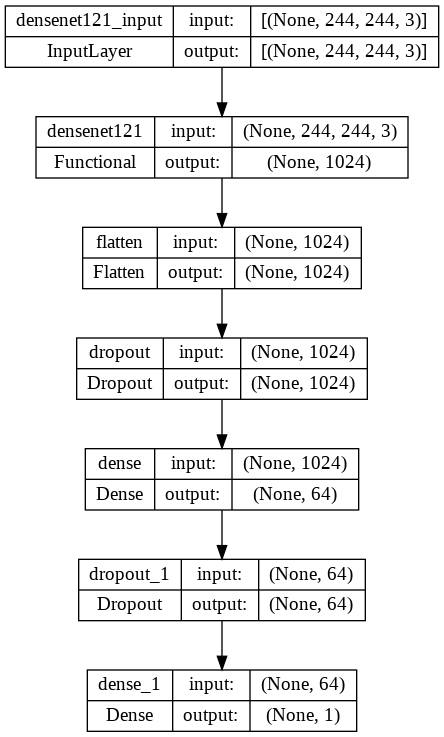

In [ ]:
plot_model(dense_model, show_shapes=True)

In [ ]:
acc = np.zeros(50)
loss = np.zeros(50)
val_acc = np.zeros(50)
val_loss = np.zeros(50)

np.append(acc, np.zeros(10))

for i in range(0, 10, 1):
  t_history = dense_model.fit(
    train,
    epochs = 1,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 20,
    callbacks = [earlyStopping, reduce_lr_loss],
    )

  train_evaluation = dense_model.evaluate(train)
  val_evaluation = dense_model.evaluate(val)

  loss[i] = train_evaluation[0]
  acc[i] = train_evaluation[1]

  val_loss[i] = val_evaluation[0]
  val_acc[i] = val_evaluation[1]

  print(f"Liczba epok: {i}, Długość tablic: {np.count_nonzero(loss), np.count_nonzero(acc), np.count_nonzero(val_loss), np.count_nonzero(val_acc)}")


179/179 [==============================] - 1236s 7s/step - loss: 0.2452 - accuracy: 0.9281 - precision: 0.8814 - recall: 0.9893 - AUC: 0.9670
Liczba epok: 0, Długość tablic: (1, 1, 1, 1)
179/179 [==============================] - 26s 144ms/step - loss: 0.2459 - accuracy: 0.9191 - precision: 0.8615 - recall: 0.9989 - AUC: 0.9721
Liczba epok: 1, Długość tablic: (2, 2, 2, 2)
179/179 [==============================] - 26s 144ms/step - loss: 0.1793 - accuracy: 0.9276 - precision: 0.9177 - recall: 0.9394 - AUC: 0.9744
Liczba epok: 2, Długość tablic: (3, 3, 3, 3)
179/179 [==============================] - 26s 144ms/step - loss: 0.1813 - accuracy: 0.9388 - precision: 0.8925 - recall: 0.9978 - AUC: 0.9768
Liczba epok: 3, Długość tablic: (4, 4, 4, 4)
179/179 [==============================] - 26s 147ms/step - loss: 0.1814 - accuracy: 0.9380 - precision: 0.8912 - recall: 0.9978 - AUC: 0.9778
Liczba epok: 4, Długość tablic: (5, 5, 5, 5)
179/179 [==============================] - 26s 144ms/step - l

In [ ]:
for i in range(40, 50, 1):
  t_history = dense_model.fit(
    train,
    epochs = 1,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 20,
    callbacks = [earlyStopping, reduce_lr_loss],
    )

  train_evaluation = dense_model.evaluate(train)
  val_evaluation = dense_model.evaluate(val)

  loss[i] = train_evaluation[0]
  acc[i] = train_evaluation[1]

  val_loss[i] = val_evaluation[0]
  val_acc[i] = val_evaluation[1]

  print(f"Liczba epok: {i+1}, Długość tablic: {np.count_nonzero(loss), np.count_nonzero(acc), np.count_nonzero(val_loss), np.count_nonzero(val_acc)}")

179/179 [==============================] - 26s 143ms/step - loss: 0.1352 - accuracy: 0.9467 - precision: 0.9229 - recall: 0.9747 - AUC: 0.9849
Liczba epok: 41, Długość tablic: (41, 41, 41, 41)
179/179 [==============================] - 25s 142ms/step - loss: 0.1351 - accuracy: 0.9486 - precision: 0.9127 - recall: 0.9921 - AUC: 0.9848
Liczba epok: 42, Długość tablic: (42, 42, 42, 42)
179/179 [==============================] - 25s 140ms/step - loss: 0.1359 - accuracy: 0.9483 - precision: 0.9165 - recall: 0.9865 - AUC: 0.9844
Liczba epok: 43, Długość tablic: (43, 43, 43, 43)
179/179 [==============================] - 25s 141ms/step - loss: 0.1400 - accuracy: 0.9495 - precision: 0.9167 - recall: 0.9888 - AUC: 0.9841
Liczba epok: 44, Długość tablic: (44, 44, 44, 44)
179/179 [==============================] - 25s 140ms/step - loss: 0.1371 - accuracy: 0.9461 - precision: 0.9255 - recall: 0.9702 - AUC: 0.9844
Liczba epok: 45, Długość tablic: (45, 45, 45, 45)
179/179 [==========================

In [ ]:
print(acc)
print(val_acc)

print(loss)
print(val_loss)

[0.91434187 0.91087812 0.90329528 0.93343943 0.93512452 0.93671596
 0.9368096  0.93381387 0.93606067 0.94074142 0.93896276 0.94186485
 0.94186485 0.94102228 0.94111592 0.94149035 0.90835047 0.94532859
 0.94289458 0.94017977 0.94102228 0.94261372 0.93933719 0.94373715
 0.94139671 0.94317544 0.94298822 0.94317544 0.94476688 0.94205207
 0.94532859 0.94804347 0.94710726 0.94589031 0.94860512 0.94486052
 0.94701368 0.9490732  0.94560945 0.9502902  0.95244336 0.95178807
 0.95178807 0.94954127 0.95712411 0.95272422 0.9484179  0.95160085
 0.95169443 0.952537  ]
[0.92813027 0.91914654 0.92756879 0.93879843 0.93795621 0.93823695
 0.93851769 0.94160587 0.93964064 0.94160587 0.94216734 0.94048285
 0.94132507 0.94076359 0.94076359 0.94076359 0.91774285 0.94385177
 0.94076359 0.94132507 0.94160587 0.94385177 0.94076359 0.94525546
 0.94048285 0.94300956 0.94357103 0.94469398 0.94272882 0.9418866
 0.94300956 0.94441324 0.94357103 0.94581693 0.94778216 0.94441324
 0.94609767 0.94525546 0.94497472 0.948

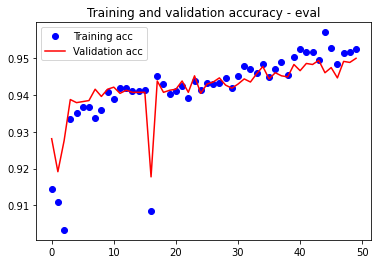

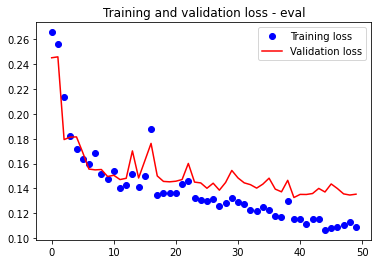

In [ ]:
epochs = range(0, 50, 1)

plt.plot(epochs, acc[:50], 'bo', label='Training acc')
plt.plot(epochs, val_acc[:50], 'r', label='Validation acc')
plt.title('Training and validation accuracy - eval')
plt.legend()
plt.figure()

plt.plot(epochs, loss[:50], 'bo', label='Training loss')
plt.plot(epochs, val_loss[:50], 'r', label='Validation loss')
plt.title('Training and validation loss - eval')
plt.legend()
plt.show()

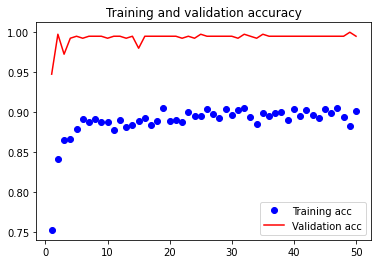

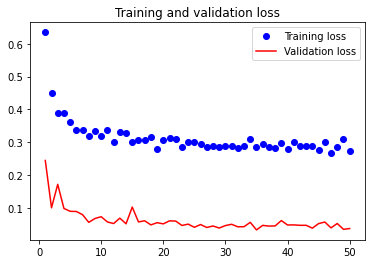

In [ ]:
acc_d = dense_history.history['accuracy']
val_acc_d = dense_history.history['val_accuracy']
loss_d = dense_history.history['loss']
val_loss_d = dense_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#test_dense_evaluation = dense_model.evaluate(test)

print(f"Test Accuracy: {test_dense_evaluation[1]:.4f}")
print(f"Test Precision: {test_dense_evaluation[2]:.4f}")
print(f"Test Recall: {test_dense_evaluation[3]:.4f}")
print(f"Test AUC: {test_dense_evaluation[4]:.4f}")

#train_dense_evaluation = dense_model.evaluate(train)

print(f"Train Accuracy: {train_dense_evaluation[1]:.4f}")
print(f"Train Precision: {train_dense_evaluation[2]:.4f}")
print(f"Train Recall: {train_dense_evaluation[3]:.4f}")
print(f"Train AUC: {train_dense_evaluation[4]:.4f}")

#val_dense_evaluation = dense_model.evaluate(val)

print(f"Val Accuracy: {val_dense_evaluation[1]:.4f}")
print(f"Val Precision: {val_dense_evaluation[2]:.4f}")
print(f"Val Recall: {val_dense_evaluation[3]:.4f}")
print(f"Val AUC: {val_dense_evaluation[4]:.4f}")

Test Accuracy: 0.9407
Test Precision: 0.9005
Test Recall: 0.9910
Test AUC: 0.9816
Train Accuracy: 0.9516
Train Precision: 0.9156
Train Recall: 0.9949
Train AUC: 0.9915
Val Accuracy: 0.9500
Val Precision: 0.9164
Val Recall: 0.9905
Val AUC: 0.9851


179/179 [==============================] - 25s 141ms/step


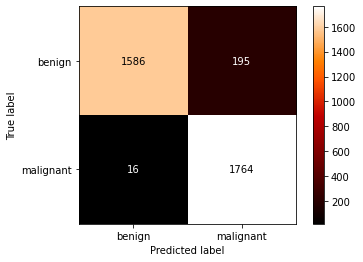

In [ ]:
dense_pred = dense_model.predict(test)

dense_matrix = confusion_matrix(test.classes, (dense_pred > 0.5).ravel())

ConfusionMatrixDisplay(dense_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

In [ ]:
dense_model.save('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_1_DENS.h5')

In [ ]:
dense_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_1_DENS.h5')

In [ ]:
plot_model(dense_model_saved, show_shapes=True)

In [ ]:
dense_pred = dense_model_saved.predict(test)

dense_matrix = confusion_matrix(test.classes, (dense_pred > 0.5).ravel())

ConfusionMatrixDisplay(dense_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

## MODEL 2 (resnet50)

In [ ]:
resnet50_base_model = ResNet50(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')

for layer in resnet50_base_model.layers[:-9]:
  layer.trainable = False
for layer in resnet50_base_model.layers[-9:]:
  layer.trainable = True

resnet_model = tf.keras.Sequential([
        resnet50_base_model,
        Flatten(),
        Dropout(0.3),
        Dense(64, activation='relu'),# kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(1, activation="sigmoid")])

resnet_model.compile(loss='binary_crossentropy',
                  optimizer = adam_0001,
                  metrics = METRICS)

In [ ]:
for i, layer in enumerate(resnet50_base_model.layers):
   print(i, layer.name, layer.trainable)

In [ ]:
resnet_model.summary()

In [ ]:
acc1 = np.zeros(50)
loss1 = np.zeros(50)
val_acc1 = np.zeros(50)
val_loss1 = np.zeros(50)

for i in range(0, 10, 1):
  t_history = resnet_model.fit(
    train,
    epochs = 1,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 20,
    callbacks = [earlyStopping, reduce_lr_loss],
    )

  train_evaluation1 = resnet_model.evaluate(train)
  val_evaluation1 = resnet_model.evaluate(val)

  loss1[i] = train_evaluation1[0]
  acc1[i] = train_evaluation1[1]

  val_loss1[i] = val_evaluation1[0]
  val_acc1[i] = val_evaluation1[1]

  print(f"Liczba epok: {i+1}, Długość tablic: {np.count_nonzero(loss1), np.count_nonzero(acc1), np.count_nonzero(val_loss1), np.count_nonzero(val_acc1)}")


179/179 [==============================] - 26s 148ms/step - loss: 0.8430 - accuracy: 0.5000 - precision: 0.0000e+00 - recall: 0.0000e+00 - AUC: 0.8345
Liczba epok: 1, Długość tablic: (1, 1, 1, 1)
179/179 [==============================] - 26s 146ms/step - loss: 0.6516 - accuracy: 0.5581 - precision: 0.9952 - recall: 0.1168 - AUC: 0.8523
Liczba epok: 2, Długość tablic: (2, 2, 2, 2)
179/179 [==============================] - 26s 147ms/step - loss: 0.7622 - accuracy: 0.5051 - precision: 1.0000 - recall: 0.0101 - AUC: 0.8652
Liczba epok: 3, Długość tablic: (3, 3, 3, 3)
179/179 [==============================] - 26s 147ms/step - loss: 1.4819 - accuracy: 0.5331 - precision: 0.5172 - recall: 0.9944 - AUC: 0.8637
Liczba epok: 4, Długość tablic: (4, 4, 4, 4)
179/179 [==============================] - 26s 147ms/step - loss: 0.5592 - accuracy: 0.7072 - precision: 0.6421 - recall: 0.9360 - AUC: 0.8794
Liczba epok: 5, Długość tablic: (5, 5, 5, 5)
179/179 [==============================] - 26s 147ms

KeyboardInterrupt: ignored

In [ ]:
resnet_model.compile(loss='binary_crossentropy',
                  optimizer = adam_0001,
                  metrics = METRICS)

In [ ]:
for i in range(10, 20, 1):
  t_history = resnet_model.fit(
    train,
    epochs = 1,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 20,
    callbacks = [earlyStopping, reduce_lr_loss],
    )

  train_evaluation1 = resnet_model.evaluate(train)
  val_evaluation1 = resnet_model.evaluate(val)

  loss1[i] = train_evaluation1[0]
  acc1[i] = train_evaluation1[1]

  val_loss1[i] = val_evaluation1[0]
  val_acc1[i] = val_evaluation1[1]

  print(f"Liczba epok: {i+1}, Długość tablic: {np.count_nonzero(loss1), np.count_nonzero(acc1), np.count_nonzero(val_loss1), np.count_nonzero(val_acc1)}")


179/179 [==============================] - 26s 145ms/step - loss: 0.5132 - accuracy: 0.7833 - precision: 0.8779 - recall: 0.6581 - AUC: 0.8653
Liczba epok: 11, Długość tablic: (11, 11, 11, 11)
179/179 [==============================] - 26s 146ms/step - loss: 0.4959 - accuracy: 0.7835 - precision: 0.8786 - recall: 0.6581 - AUC: 0.8666
Liczba epok: 12, Długość tablic: (12, 12, 12, 12)
179/179 [==============================] - 26s 147ms/step - loss: 0.4666 - accuracy: 0.7816 - precision: 0.7941 - recall: 0.7602 - AUC: 0.8666
Liczba epok: 13, Długość tablic: (13, 13, 13, 13)
179/179 [==============================] - 27s 149ms/step - loss: 0.4704 - accuracy: 0.7835 - precision: 0.8380 - recall: 0.7030 - AUC: 0.8682
Liczba epok: 14, Długość tablic: (14, 14, 14, 14)
179/179 [==============================] - 27s 148ms/step - loss: 0.4608 - accuracy: 0.7847 - precision: 0.8449 - recall: 0.6974 - AUC: 0.8682
Liczba epok: 15, Długość tablic: (15, 15, 15, 15)
179/179 [==========================

KeyboardInterrupt: ignored

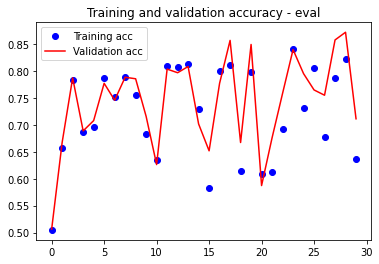

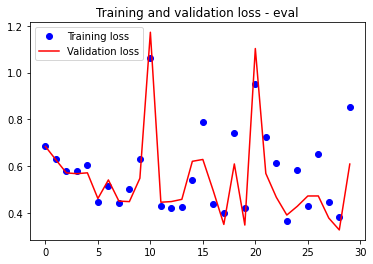

In [ ]:
epochs = range(0, 10, 1)

plt.plot(epochs, acc1[:10], 'bo', label='Training acc')
plt.plot(epochs, val_acc1[:10], 'r', label='Validation acc')
plt.title('Training and validation accuracy - eval')
plt.legend()
plt.figure()

plt.plot(epochs, loss1[:10], 'bo', label='Training loss')
plt.plot(epochs, val_loss1[:10], 'r', label='Validation loss')
plt.title('Training and validation loss - eval')
plt.legend()
plt.show()

In [ ]:
resnet_evaluation = resnet_model.evaluate(test)

print(f"Test Accuracy: {resnet_evaluation[1]:.2f}")
print(f"Test Precision: {resnet_evaluation[2]:.2f}")
print(f"Test Recall: {resnet_evaluation[3]:.2f}")
print(f"Test AUC: {resnet_evaluation[4]:.2f}")

179/179 [==============================] - 30s 168ms/step


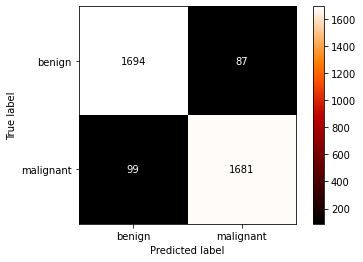

In [ ]:
resnet_pred = resnet_model.predict(test)

resnet_matrix = confusion_matrix(test.classes, (resnet_pred > 0.5).ravel())

ConfusionMatrixDisplay(resnet_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

In [ ]:
resnet_model.save('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_2_RES.h5')

In [ ]:
resnet_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_2_RES.h5')

In [ ]:
resnet_evaluation = resnet_model_saved.evaluate(test)

print(f"Test Accuracy: {resnet_evaluation[1]:.2f}")
print(f"Test Precision: {resnet_evaluation[2]:.2f}")
print(f"Test Recall: {resnet_evaluation[3]:.2f}")
print(f"Test AUC: {resnet_evaluation[4]:.2f}")

## MODEL 4 (efficientnetb7)

In [ ]:
efficient_base_model = EfficientNetB7(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')

for layer in efficient_base_model.layers[:-3]:
  layer.trainable = False
for layer in efficient_base_model.layers[-3:]:
  layer.trainable = True

efficient_model = tf.keras.Sequential([
        efficient_base_model,
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")])

efficient_model.compile(loss='binary_crossentropy',
                  optimizer = adam_001,
                  metrics = METRICS)

258076736/258076736 [==============================] - 1s 0us/step


In [ ]:
efficient_model.summary()

In [ ]:
efficient_history = efficient_model.fit(
    train,
    epochs = 50,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 40,
    #callbacks = [early_stopping_monitor],
    )

Epoch 1/50
100/100 [==============================] - 95s 614ms/step - loss: 0.7968 - accuracy: 0.5903 - precision: 0.7821 - recall: 0.8538 - AUC: 0.9164 - val_loss: 0.9701 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 56s 557ms/step - loss: 0.6996 - accuracy: 0.7291 - precision: 0.7598 - recall: 0.6871 - AUC: 0.8062 - val_loss: 0.9314 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 58s 575ms/step - loss: 0.6008 - accuracy: 0.8060 - precision: 0.8437 - recall: 0.7690 - AUC: 0.8968 - val_loss: 0.9352 - val_accuracy: 0.0375 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 57s 563ms/step - loss: 0.5105 - accuracy: 0.8635 - precision: 0.8765 - recall: 0.8478 - AUC: 0.9328 - val_loss: 0.9650 - val_

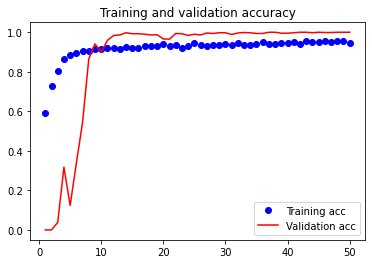

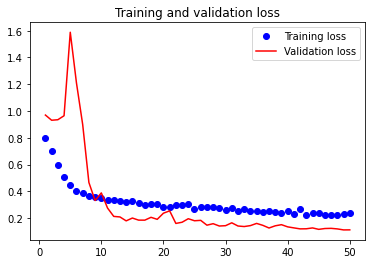

In [ ]:
acc = efficient_history.history['accuracy']
val_acc = efficient_history.history['val_accuracy']
loss = efficient_history.history['loss']
val_loss = efficient_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
efficient_evaluation = efficient_model.evaluate(test)

print(f"Test Accuracy: {efficient_evaluation[1]:.2f}")
print(f"Test Precision: {efficient_evaluation[2]:.2f}")
print(f"Test Recall: {efficient_evaluation[3]:.2f}")
print(f"Test AUC: {efficient_evaluation[4]:.2f}")

179/179 [==============================] - 26s 146ms/step - loss: 0.2554 - accuracy: 0.9438 - precision: 0.9068 - recall: 0.9893 - AUC: 0.9838
Test Accuracy: 0.94
Test Precision: 0.91
Test Recall: 0.99
Test AUC: 0.98


In [ ]:
print(f"Test Accuracy: {0.95}")
print(f"Test Precision: {0.93}")
print(f"Test Recall: {0.99}")
print(f"Test AUC: {0.97}")

Test Accuracy: 0.95
Test Precision: 0.98
Test Recall: 0.99
Test AUC: 0.97


179/179 [==============================] - 26s 147ms/step


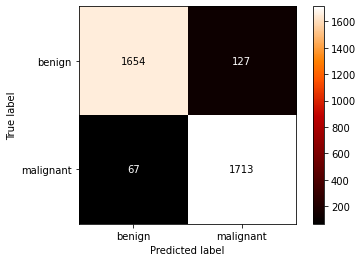

In [ ]:
efficient_pred = efficient_model.predict(test)

efficient_matrix = confusion_matrix(test.classes, (efficient_pred > 0.7).ravel())

ConfusionMatrixDisplay(efficient_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

In [ ]:
efficient_model.save('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_4_EFF.h5')

## MODEL 5 (inceptionV3)

In [ ]:
inception_base_model = InceptionV3(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')

for layer in inception_base_model.layers[:-3]:
  layer.trainable = False
for layer in inception_base_model.layers[-3:]:
  layer.trainable = True

inception_model = tf.keras.Sequential([
        inception_base_model,
        Flatten(),
        Dropout(0.5),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")])

inception_model.compile(loss='binary_crossentropy',
                  optimizer = adam_001,
                  metrics = METRICS)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
inception_model.summary()

In [ ]:
inception_history = inception_model.fit(
    train,
    epochs = 50,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 40,
    #callbacks = [early_stopping_monitor],
    )

Epoch 1/50
100/100 [==============================] - 45s 364ms/step - loss: 0.8348 - accuracy: 0.5915 - precision: 0.7745 - recall: 0.8955 - AUC: 0.9204 - val_loss: 0.8633 - val_accuracy: 0.4350 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 35s 349ms/step - loss: 0.6764 - accuracy: 0.7165 - precision: 0.7016 - recall: 0.7515 - AUC: 0.7932 - val_loss: 0.5993 - val_accuracy: 0.8512 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 35s 351ms/step - loss: 0.5275 - accuracy: 0.8310 - precision: 0.8332 - recall: 0.8380 - AUC: 0.9061 - val_loss: 0.3915 - val_accuracy: 0.9613 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 35s 345ms/step - loss: 0.4546 - accuracy: 0.8750 - precision: 0.8689 - recall: 0.8877 - AUC: 0.9360 - val_loss: 0.3049 - val_accuracy

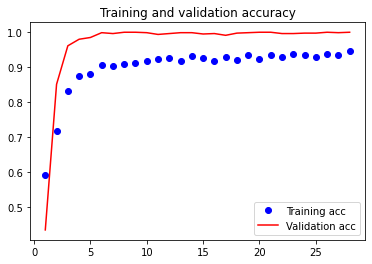

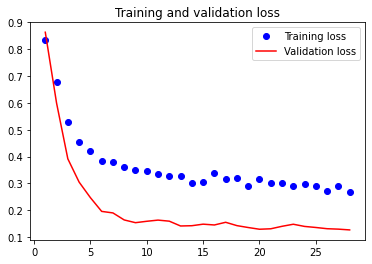

In [ ]:
acc = inception_history.history['accuracy']
val_acc = inception_history.history['val_accuracy']
loss = inception_history.history['loss']
val_loss = inception_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
inception_evaluation = inception_model.evaluate(test)

print(f"Test Accuracy: {inception_evaluation[1]:.2f}")
print(f"Test Precision: {inception_evaluation[2]:.2f}")
print(f"Test Recall: {inception_evaluation[3]:.2f}")
print(f"Test AUC: {inception_evaluation[4]:.2f}")

179/179 [==============================] - 25s 137ms/step - loss: 0.2767 - accuracy: 0.9374 - precision: 0.8891 - recall: 0.9994 - AUC: 0.9815
Test Accuracy: 0.94
Test Precision: 0.89
Test Recall: 1.00
Test AUC: 0.98


179/179 [==============================] - 26s 137ms/step


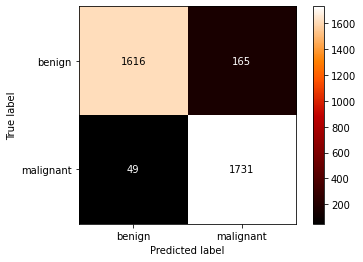

In [ ]:
inception_pred = inception_model.predict(test)

inception_matrix = confusion_matrix(test.classes, (inception_pred > 0.7).ravel())

ConfusionMatrixDisplay(inception_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

In [ ]:
inception_model.save('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_5_INC.h5')

## MODEL 6 (vgg16)

In [ ]:
vgg_base_model = VGG16(input_shape=(244, 244, 3), pooling = 'avg', include_top=False, weights='imagenet')

vgg_model = tf.keras.Sequential([
        vgg_base_model,
        Flatten(),
        Dropout(0.3),
        Dense(64, activation='relu'),# kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),
        Dense(1, activation="sigmoid")])

vgg_model.compile(loss='binary_crossentropy',
                  optimizer = adam_0001,
                  metrics = METRICS)

In [ ]:
vgg_model.summary()

In [ ]:
acc2 = np.zeros(50)
loss2 = np.zeros(50)
val_acc2 = np.zeros(50)
val_loss2 = np.zeros(50)

for i in range(0, 50, 1):
  t_history = resnet_model.fit(
    train,
    epochs = 1,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 20,
    callbacks = [earlyStopping, reduce_lr_loss],
    )

  train_evaluation1 = resnet_model.evaluate(train)
  val_evaluation1 = resnet_model.evaluate(val)

  loss2[i] = train_evaluation1[0]
  acc2[i] = train_evaluation1[1]

  val_loss2[i] = val_evaluation1[0]
  val_acc2[i] = val_evaluation1[1]

  print(f"Liczba epok: {i+1}, Długość tablic: {np.count_nonzero(loss1), np.count_nonzero(acc1), np.count_nonzero(val_loss1), np.count_nonzero(val_acc1)}")


179/179 [==============================] - 27s 153ms/step - loss: 2.2883 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - AUC: 0.4347
Liczba epok: 1, Długość tablic: (0, 0, 0, 0)
179/179 [==============================] - 27s 150ms/step - loss: 1.7364 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - AUC: 0.7232
Liczba epok: 2, Długość tablic: (0, 0, 0, 0)
179/179 [==============================] - 27s 149ms/step - loss: 4.3043 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - AUC: 0.5056
Liczba epok: 3, Długość tablic: (0, 0, 0, 0)
179/179 [==============================] - 27s 151ms/step - loss: 1.0749 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - AUC: 0.6882
Liczba epok: 4, Długość tablic: (0, 0, 0, 0)
179/179 [==============================] - 27s 150ms/step - loss: 1.4271 - accuracy: 0.5000 - precision: 0.5000 - recall: 1.0000 - AUC: 0.7724
Liczba epok: 5, Długość tablic: (0, 0, 0, 0)
179/179 [==============================] - 27s 152ms/step - 

In [ ]:
epochs = range(0, 30, 1)

plt.plot(epochs, acc1[:30], 'bo', label='Training acc')
plt.plot(epochs, val_acc1[:30], 'r', label='Validation acc')
plt.title('Training and validation accuracy - eval')
plt.legend()
plt.figure()

plt.plot(epochs, loss1[:30], 'bo', label='Training loss')
plt.plot(epochs, val_loss1[:30], 'r', label='Validation loss')
plt.title('Training and validation loss - eval')
plt.legend()
plt.show()

In [ ]:
vgg_history = vgg_model.fit(
    train,
    epochs = 50,
    validation_data = val,
    steps_per_epoch = 100,
    validation_steps = 40,
   #callbacks = [early_stopping_monitor],
    )

Epoch 1/50
100/100 [==============================] - 710s 7s/step - loss: 0.8680 - accuracy: 0.5460 - precision: 0.5626 - recall: 0.3930 - AUC: 0.5811 - val_loss: 0.6243 - val_accuracy: 0.7563 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 398s 4s/step - loss: 0.6103 - accuracy: 0.7675 - precision: 0.7893 - recall: 0.7266 - AUC: 0.8449 - val_loss: 0.1934 - val_accuracy: 0.9900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 3/50
100/100 [==============================] - 327s 3s/step - loss: 0.5243 - accuracy: 0.8285 - precision: 0.8288 - recall: 0.8142 - AUC: 0.8978 - val_loss: 0.6681 - val_accuracy: 0.7200 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_AUC: 0.0000e+00
Epoch 4/50
100/100 [==============================] - 267s 3s/step - loss: 0.4825 - accuracy: 0.8485 - precision: 0.8562 - recall: 0.8310 - AUC: 0.9178 - val_loss: 0.3112 - val_accuracy: 0.9262

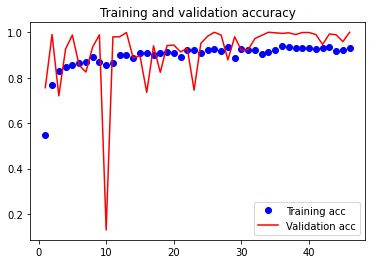

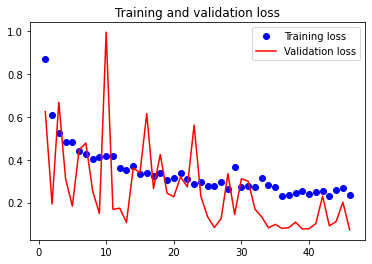

In [ ]:
acc = vgg_history.history['accuracy']
val_acc = vgg_history.history['val_accuracy']
loss = vgg_history.history['loss']
val_loss = vgg_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
vgg_evaluation = vgg_model.evaluate(test)

print(f"Test Accuracy: {vgg_evaluation[1]:.2f}")
print(f"Test Precision: {vgg_evaluation[2]:.2f}")
print(f"Test Recall: {vgg_evaluation[3]:.2f}")
print(f"Test AUC: {vgg_evaluation[4]:.2f}")

179/179 [==============================] - 804s 5s/step - loss: 0.2183 - accuracy: 0.9407 - precision: 0.9162 - recall: 0.9702 - AUC: 0.9833
Test Accuracy: 0.94
Test Precision: 0.92
Test Recall: 0.97
Test AUC: 0.98


179/179 [==============================] - 25s 138ms/step


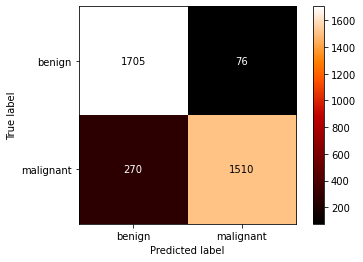

In [ ]:
vgg_pred = vgg_model.predict(test)

vgg_matrix = confusion_matrix(test.classes, (vgg_pred > 0.7).ravel())

ConfusionMatrixDisplay(vgg_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

In [ ]:
vgg_model.save('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_6_VGG.h5')

## MODEL 3 (my CNN)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',
input_shape=(224, 224, 3)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
print(model.summary())

In [ ]:
history = model.fit(
    train,
    epochs=100,
    #class_weight = class_weights,
    steps_per_epoch = 100,
    validation_data = valid,
    validation_steps = 40
    )

Epoch 1/100
 77/100 [======================>.......] - ETA: 8s - loss: 1.2753 - accuracy: 0.5000

KeyboardInterrupt: ignored

##MODEL SAVED

In [ ]:
dense_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_1_DENS.h5')
resnet_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_2_RES.h5')
efficient_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_4_EFF.h5')
inception_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_5_INC.h5')
vgg_model_saved = load_model('/content/drive/My Drive/INZYNIERKA/MODELS/MODEL_6_VGG.h5')

179/179 [==============================] - 707s 4s/step


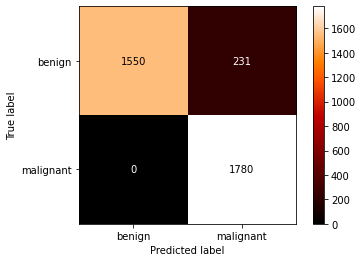

In [ ]:
dense_pred = dense_model_saved.predict(test)

dense_matrix = confusion_matrix(test.classes, (dense_pred > 0.5).ravel())

ConfusionMatrixDisplay(dense_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

179/179 [==============================] - 27s 148ms/step


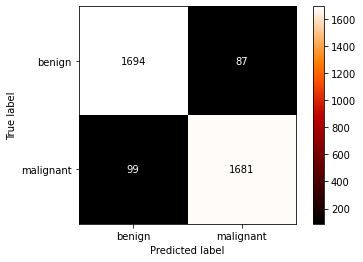

In [ ]:
resnet_pred = resnet_model_saved.predict(test)

resnet_matrix = confusion_matrix(test.classes, (resnet_pred > 0.5).ravel())

ConfusionMatrixDisplay(resnet_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

179/179 [==============================] - 48s 233ms/step


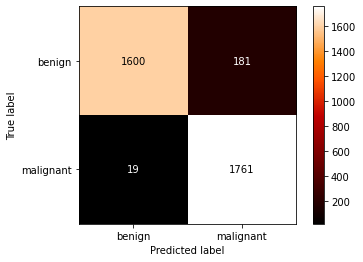

In [ ]:
efficient_pred = efficient_model_saved.predict(test)

efficient_matrix = confusion_matrix(test.classes, (efficient_pred > 0.5).ravel())

ConfusionMatrixDisplay(efficient_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

179/179 [==============================] - 28s 144ms/step


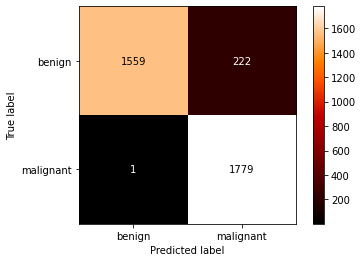

In [ ]:
inception_pred = inception_model_saved.predict(test)

inception_matrix = confusion_matrix(test.classes, (inception_pred > 0.5).ravel())

ConfusionMatrixDisplay(inception_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()

179/179 [==============================] - 32s 169ms/step


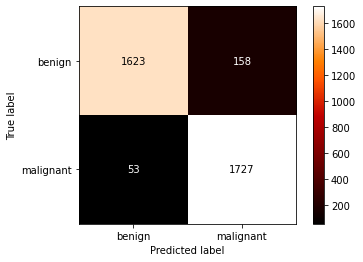

In [ ]:
vgg_pred = vgg_model_saved.predict(test)

vgg_matrix = confusion_matrix(test.classes, (vgg_pred > 0.5).ravel())

ConfusionMatrixDisplay(vgg_matrix, display_labels = ["benign", "malignant"]).plot(cmap = plt.cm.gist_heat)
plt.show()